<a href="https://colab.research.google.com/github/cdss8/AI-ML/blob/main/Laboratory4_JM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Juan manuel Sialo
#Laboratoriio 4

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('/content/gdrive/My Drive/AI-ML/covtype.data', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [20]:
columns=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'] + [f'Wilderness_Area{i}' for i in range(1,5)] + [f'Soil_Type{i}' for i in range(1,41)] + ['Cover_Type'] 
data = data.rename(lambda x: columns[x], axis=1)

data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [24]:
selectedData = data[['Elevation', 'Horizontal_Distance_To_Roadways']]
selectedData.head()

,Elevation,Horizontal_Distance_To_Roadways
0,2596,510
1,2590,390
2,2804,3180
3,2785,3090
4,2595,391


In [25]:
dataStudy = data[['Elevation', 'Horizontal_Distance_To_Roadways', 'Cover_Type']].sample(frac=0.05,
random_state = 1)
X = dataStudy[['Elevation', 'Horizontal_Distance_To_Roadways']]
Y = dataStudy[['Cover_Type']]
X.shape

(29051, 2)

<Figure size 3000x3000 with 0 Axes>

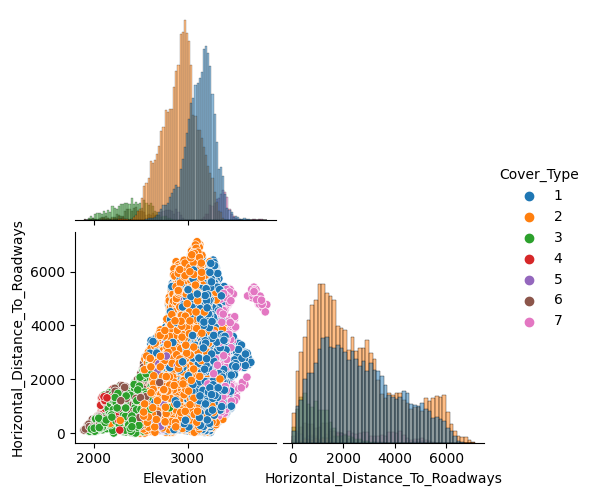

In [35]:
plt.figure(figsize=(30,30))
sns.pairplot(dataStudy[['Elevation', 'Horizontal_Distance_To_Roadways','Cover_Type']], corner =
True, hue = 'Cover_Type',diag_kind='hist',palette='tab10')

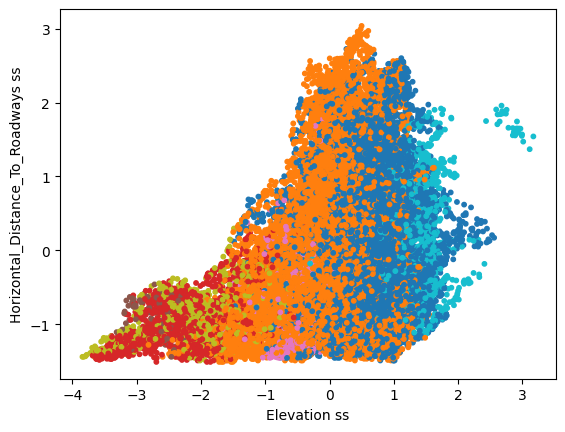

In [40]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

X_ss= ss.fit_transform(X)
plt.scatter(X_ss[:,0],X_ss[:,1],s=10,

c=Y['Cover_Type'].values,cmap=plt.cm.tab10)
plt.xlabel('Elevation ss')
plt.ylabel('Horizontal_Distance_To_Roadways ss')

plt.show()

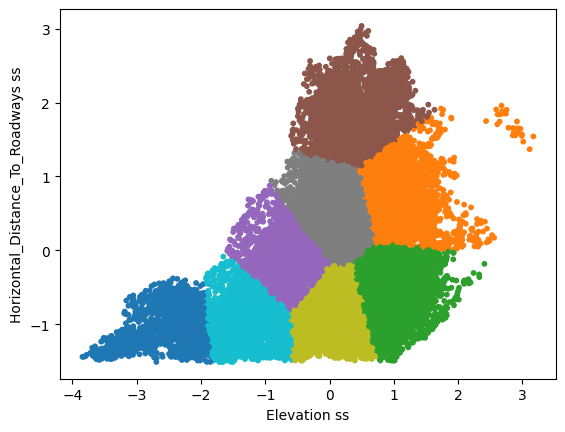

In [65]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters= 8, max_iter=200, n_init=15, random_state=1)

Y_km = km.fit_predict(X_ss)
plt.scatter(X_ss[:,0],X_ss[:,1],s=10,
c=Y_km,cmap=plt.cm.tab10)

plt.xlabel('Elevation ss')
plt.ylabel('Horizontal_Distance_To_Roadways ss')

plt.show()

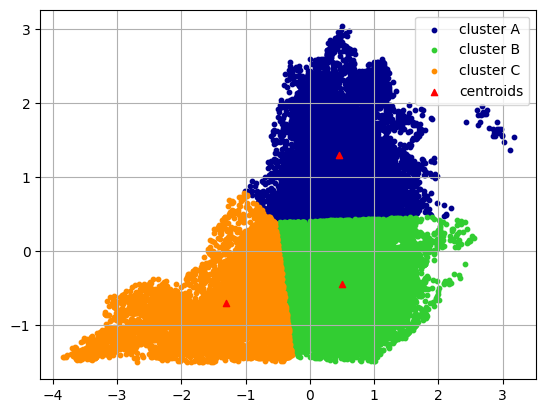

In [64]:
plt.scatter(X_ss[Y_km==0,0],X_ss[Y_km==0,1],s=10,c='darkblue',label='cluster A')
plt.scatter(X_ss[Y_km==1,0],X_ss[Y_km==1,1],s=10,c='limegreen',label='cluster B')
plt.scatter(X_ss[Y_km==2,0],X_ss[Y_km==2,1],s=10,c='darkorange',label='cluster C')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=20,marker='^', c='red',label = 'centroids')

plt.legend()
plt.grid()
plt.show()

In [59]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
solutions = []
for i in range(2,11):
  print(i)
  km = KMeans(n_clusters = i, max_iter=500, n_init=10, random_state=1)
  Y_km = km.fit_predict(X_ss)
  silhouette_scores.append(silhouette_score(X_ss, Y_km, sample_size=25000))
  solutions.append(km)

2
3
4
5
6
7
8
9
10


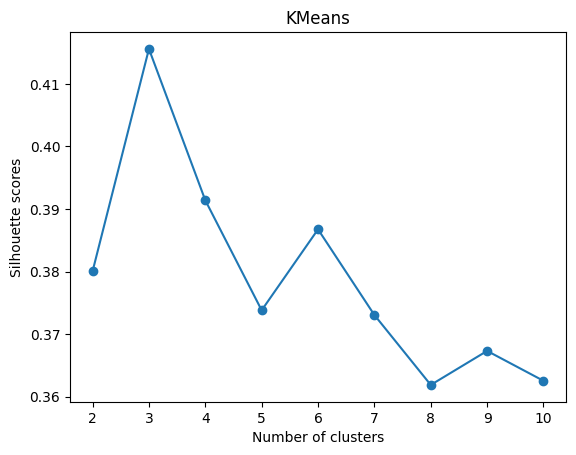

In [60]:
plt.title('KMeans')
plt.plot(range(2,11),silhouette_scores,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette scores')

plt.show()

In [61]:
print(silhouette_scores[1])

0.4155961301953567


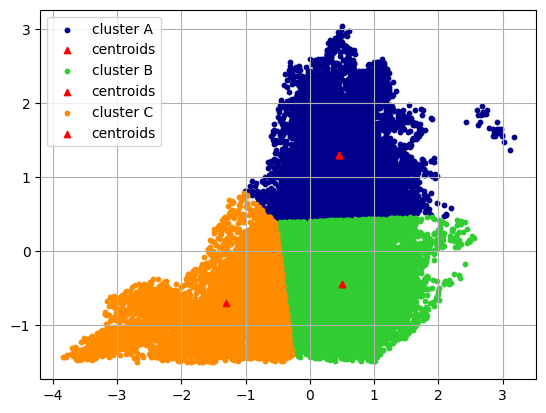

In [70]:
solution = solutions[1]
y_km = solution.labels_
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
colours = ['darkblue', 'limegreen', 'darkorange', 'yellow', 'brown', 'blue', 'cyan', 'green']
for i in range(0,y_km.max()+1):
  plt.scatter(X_ss[y_km==i,0],X_ss[y_km==i,1],s=10,c=colours[i],label=f'cluster {alphabet[i]}')
  plt.scatter(solution.cluster_centers_[:,0],solution.cluster_centers_[:,1],s=20,marker='^', c='red',label = 'centroids')

plt.legend()
plt.grid()
plt.show()

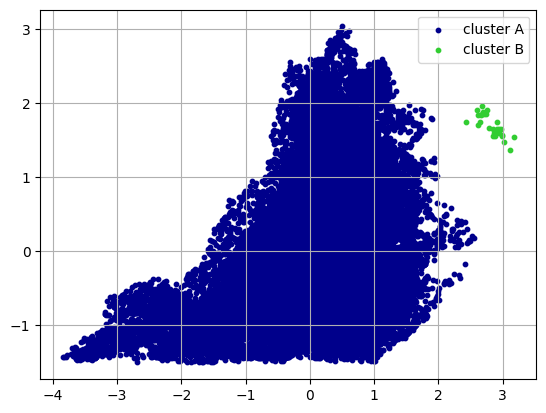

In [72]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.25, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_ss)
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
colours = ['darkblue', 'limegreen', 'darkorange', 'yellow', 'brown', 'blue', 'cyan', 'green']
for i in range(clusters_dbscan.max()+1):
  plt.scatter(X_ss[clusters_dbscan==i,0],X_ss[clusters_dbscan==i,1],s=10,c=colours[i],label=f'cluster {alphabet[i]}')

plt.legend()
plt.grid()
plt.show()

In [73]:
from sklearn.metrics import silhouette_score

silhouette_scores_dbscan = []
solutions_dbscan = []

for i in [0.1, 0.25, 0.5, 0.75]:
  print(i)
  dbscan = DBSCAN(eps=i, min_samples=5)
  y_dbscan = dbscan.fit_predict(X_ss)

  if y_dbscan.max() == 0:
    silhouette_scores_dbscan.append(0)
  else:
    silhouette_scores_dbscan.append(silhouette_score(X_ss, y_dbscan, sample_size = 25000))

  solutions_dbscan.append(dbscan)

0.1
0.25
0.5
0.75


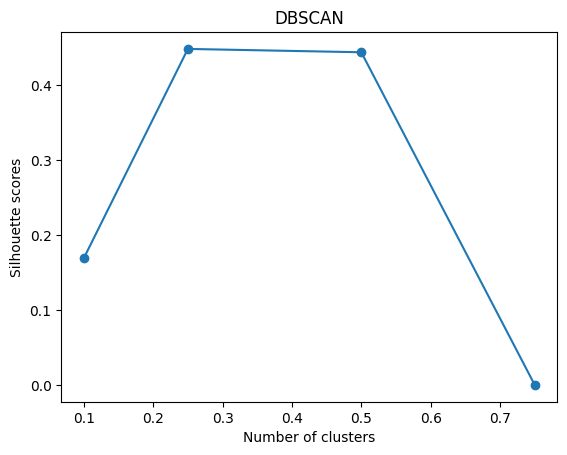

In [74]:
plt.title('DBSCAN')
plt.plot([0.1, 0.25, 0.5, 0.75],silhouette_scores_dbscan,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette scores')
plt.show()

In [75]:
print(silhouette_scores_dbscan[2])

0.44393495627955565


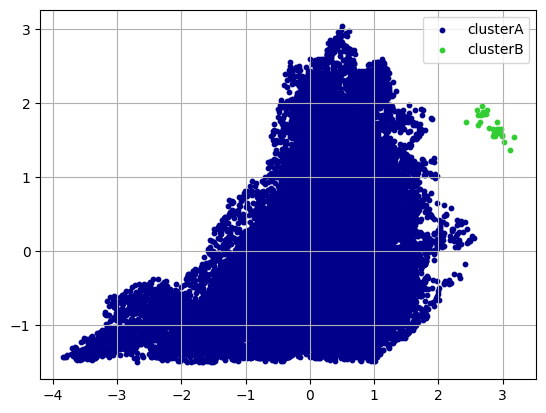

In [78]:
solution = solutions_dbscan[1]
y = solution.labels_

alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
colours = ['darkblue', 'limegreen', 'darkorange', 'yellow', 'brown', 'blue', 'cyan', 'green']

for i in range(y.max()+1):
  plt.scatter(X_ss[y==i,0],X_ss[y==i,1],s=10,c=colours[i%len(colours)],label=f'cluster{alphabet[i%len(alphabet)]}')

plt.legend()
plt.grid()
plt.show()

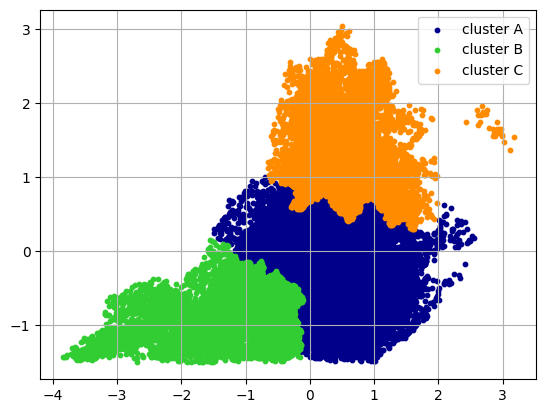

In [79]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters = 3, memory = '/content/gdrive/My Drive/')

clusters_clustering = clustering.fit_predict(X_ss)
plt.scatter(X_ss[clusters_clustering==0,0],X_ss[clusters_clustering==0,1],s=10,c='darkblue',label='cluster A')
plt.scatter(X_ss[clusters_clustering==1,0],X_ss[clusters_clustering==1,1],s=10,c='limegreen',label='cluster B')
plt.scatter(X_ss[clusters_clustering==2,0],X_ss[clusters_clustering==2,1],s=10,c='darkorange',label='cluster C')

plt.legend()
plt.grid()
plt.show()

In [80]:
from sklearn.metrics import silhouette_score

silhouette_scores_clustering = []
solutions_clustering = []

for i in range(2,11):
  print(i)
  clustering = AgglomerativeClustering(n_clusters = i)
  y_clustering = clustering.fit_predict(X_ss)
  silhouette_scores_clustering.append(silhouette_score(X_ss, y_clustering, sample_size=25000))

solutions_clustering.append(clustering)

2
3
4
5
6
7
8
9
10


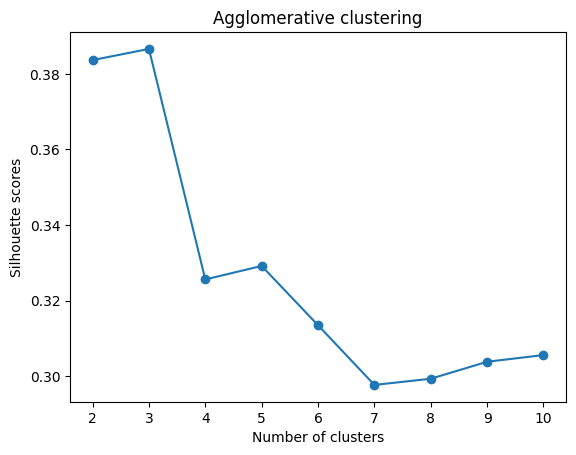

In [81]:
plt.title('Agglomerative clustering')
plt.plot(range(2,11),silhouette_scores_clustering,marker='o')

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette scores')

plt.show()

In [96]:
print(silhouette_scores_clustering[3])

0.329174395990685
